<a href="https://colab.research.google.com/github/Vladimir-Mezernyy/REGULARIZATION_PRACTICE/blob/main/REGULARIZATION_PRACTICE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [17]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.reuters.load_data(num_words=10000)

In [18]:
class_names = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

In [31]:
#one_hot_###_labels = oh#l
ohtrl = tf.keras.utils.to_categorical(train_labels)
ohtel = tf.keras.utils.to_categorical(test_labels)

In [35]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. 
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = ohtrl[:1000]
partial_y_train = ohtrl[1000:]


In [40]:
bad_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])
bad_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

bad_history = bad_model.fit(partial_x_train,
              partial_y_train,
              epochs=20,
              batch_size=128,
              validation_data=(x_val, y_val)
              )

Epoch 1/20
63/63 [==============================] - 2s 16ms/step - loss: 2.4060 - acc: 0.4778 - val_loss: 1.5750 - val_acc: 0.6190
Epoch 2/20
63/63 [==============================] - 1s 11ms/step - loss: 1.3193 - acc: 0.6719 - val_loss: 1.2219 - val_acc: 0.7030
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9379 - acc: 0.7557 - val_loss: 1.1549 - val_acc: 0.7230
Epoch 4/20
63/63 [==============================] - 1s 11ms/step - loss: 0.6883 - acc: 0.8156 - val_loss: 1.1701 - val_acc: 0.7290
Epoch 5/20
63/63 [==============================] - 1s 11ms/step - loss: 0.5309 - acc: 0.8527 - val_loss: 1.2431 - val_acc: 0.7480
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 0.4296 - acc: 0.8768 - val_loss: 1.2661 - val_acc: 0.7590
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.3584 - acc: 0.8991 - val_loss: 1.3290 - val_acc: 0.7710
Epoch 8/20
63/63 [==============================] - 1s 11ms/step - loss: 0.2852 - a

In [41]:
base_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])
base_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

base_history = base_model.fit(partial_x_train,
              partial_y_train,
              epochs=20,
              batch_size=128,
              validation_data=(x_val, y_val)
              )

Epoch 1/20
63/63 [==============================] - 2s 9ms/step - loss: 1.8213 - acc: 0.6267 - val_loss: 1.2316 - val_acc: 0.7220
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9877 - acc: 0.7821 - val_loss: 1.0290 - val_acc: 0.7660
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6733 - acc: 0.8567 - val_loss: 0.9123 - val_acc: 0.8010
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.4727 - acc: 0.9003 - val_loss: 0.8638 - val_acc: 0.8180
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.3403 - acc: 0.9260 - val_loss: 0.8331 - val_acc: 0.8210
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.2646 - acc: 0.9419 - val_loss: 0.8909 - val_acc: 0.8170
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.2168 - acc: 0.9465 - val_loss: 0.9065 - val_acc: 0.8180
Epoch 8/20
63/63 [==============================] - 0s 7ms/step - loss: 0.1886 - acc: 0.94

In [51]:
reg_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.L1L2(), activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax')
])
reg_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

reg_history = reg_model.fit(partial_x_train,
              partial_y_train,
              epochs=20,
              batch_size=128,
              validation_data=(x_val, y_val)
              )

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 2.1064 - acc: 0.5392 - val_loss: 1.4046 - val_acc: 0.6820
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.3399 - acc: 0.6897 - val_loss: 1.1856 - val_acc: 0.7230
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.1058 - acc: 0.7415 - val_loss: 1.0630 - val_acc: 0.7650
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 0.9406 - acc: 0.7800 - val_loss: 0.9942 - val_acc: 0.7800
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.8103 - acc: 0.8131 - val_loss: 0.9310 - val_acc: 0.8020
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.7060 - acc: 0.8359 - val_loss: 0.8866 - val_acc: 0.8050
Epoch 7/20
63/63 [==============================] - 1s 8ms/step - loss: 0.6112 - acc: 0.8538 - val_loss: 0.8669 - val_acc: 0.8260
Epoch 8/20
63/63 [==============================] - 1s 9ms/step - loss: 0.5331 - acc: 0.8

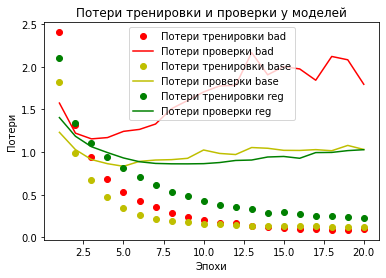

In [52]:
bad_loss = bad_history.history['loss']
bad_val_loss = bad_history.history['val_loss']
bad_acc = bad_history.history['acc']
bad_val_acc = bad_history.history['val_acc']

base_loss = base_history.history['loss']
base_val_loss = base_history.history['val_loss']
base_acc = base_history.history['acc']
base_val_acc = base_history.history['val_acc']

reg_loss = reg_history.history['loss']
reg_val_loss = reg_history.history['val_loss']
reg_acc = reg_history.history['acc']
reg_val_acc = reg_history.history['val_acc']

epochs = range(1, len(base_loss) + 1)

plt.plot(epochs, bad_loss, 'ro', label='Потери тренировки bad')
plt.plot(epochs, bad_val_loss, 'r', label='Потери проверки bad')
plt.plot(epochs, base_loss, 'yo', label='Потери тренировки base')
plt.plot(epochs, base_val_loss, 'y', label='Потери проверки base')
plt.plot(epochs, reg_loss, 'go', label='Потери тренировки reg')
plt.plot(epochs, reg_val_loss, 'g', label='Потери проверки reg')
plt.title('Потери тренировки и проверки у моделей')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
